In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())



c:\Users\felix\OneDrive\Desktop\Capstone\1\DSE6311OM_Group3\Notebook


In [3]:
os.chdir(Path().resolve())

In [4]:
# read in data set with first column (district name) set to index and check change - A.F.
df = pd.read_excel("../Data/combined_data.xlsx", index_col=0)
df.head()

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,68.0,58.9,,,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,...,0.0,119.6,99.2,11.9,81.5,88.3,90.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,16.9,34.4,,,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,...,0.0,153.8,97.1,13.9,81.3,89.6,95.7,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,33.8,58.5,,,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,...,0.0,49.6,65.6,9.4,37.3,95.6,47.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,22.2,10.6,,,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,...,0.0,395.4,100.0,13.0,88.3,97.5,98.8,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,23.6,16.0,,,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,...,0.0,80.5,92.3,12.0,80.8,78.9,82.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


### Check for null values in the dataframe.  Identify which districts have null values; if they are not public school districts (i.e., charter or vocational schools), they are dropped and excluded from analysis. - A.F.

In [5]:
df.isnull().sum()

high_needs_pct                              0
english_learners_pct                        0
first_language_not_english_pct              0
low_income_pct                              0
Students with Disabilities#                 0
Students with Disabilities%                 0
students_with_disabilities_pct              0
overall_classification                      1
reason_for_classification                   1
progress_toward_improvement_targets_pct     9
in_district_expenditures                    1
total_in_district_FTEs                      1
in_district_expenditures_per_pupil          1
total_expenditures                          1
total_pupil_FTEs                            1
total_expenditures_per_pupil                1
graduation_rate_pct                         0
still_in_school_pct                         0
non_grad_completers_pct                     0
hs_equivalency_pct                          0
dropout_rate_pct                            0
permanently_excluded_pct          

In [6]:
df[df['overall_classification'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
State Totals,55.1,12.1,25.0,42.3,,,19.4,NaN,NaN,NaN,...,0.0,"76,977.6",97.1,11.9,81.3,93.4,92.3,State Totals,NaN,NaN


In [7]:
df.drop(['State Totals'], axis = 0, inplace = True)

In [8]:
df[df['population'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Argosy Collegiate Charter School (District),85.0,22.1,26.2,74.1,,,24.2,Not requiring assistance or intervention,Moderate progress toward targets,43.0,...,1.8,32.6,68.9,16.9,47.6,75.2,53.1,Argosy Collegiate Charter School (District),NaN,NaN
Assabet Valley Regional Vocational Technical,58.9,5.9,23.9,41.0,,,24.1,Not requiring assistance or intervention,Substantial progress toward targets,64.0,...,0.0,111.2,97.3,10.1,88.3,92.8,93.8,Assabet Valley Regional Vocational Technical,NaN,NaN
Baystate Academy Charter Public School (District),88.8,8.5,23.4,84.3,,,22.1,Requiring assistance or intervention,In need of focused/targeted support,42.0,...,1.9,56.1,46.0,7.2,28.0,80.4,35.6,Baystate Academy Charter Public School (District),NaN,NaN
Blackstone Valley Regional Vocational Technical,25.0,0.5,5.4,15.0,,,12.5,Not requiring assistance or intervention,Meeting or exceeding targets,75.0,...,0.0,107.0,100.0,11.5,89.7,88.8,90.7,Blackstone Valley Regional Vocational Technical,NaN,NaN
Blue Hills Regional Vocational Technical,57.5,1.1,5.7,39.8,,,26.8,Not requiring assistance or intervention,Meeting or exceeding targets,95.0,...,0.0,80.8,100.0,11.4,93.6,91.3,98.8,Blue Hills Regional Vocational Technical,NaN,NaN
Boston Green Academy Horace Mann Charter School (District),88.2,14.7,34.5,79.4,,,31.5,Not requiring assistance or intervention,Substantial progress toward targets,54.0,...,0.0,46.6,93.3,10.2,68.2,91.0,80.0,Boston Green Academy Horace Mann Charter Schoo...,NaN,NaN
Bristol County Agricultural,41.3,0.0,0.0,30.4,,,15.7,Not requiring assistance or intervention,Substantial progress toward targets,54.0,...,0.0,46.8,97.9,11.7,74.5,87.2,85.7,Bristol County Agricultural,NaN,NaN
Bristol-Plymouth Regional Vocational Technical,40.8,0.5,1.5,30.8,,,15.2,Not requiring assistance or intervention,Substantial progress toward targets,69.0,...,0.0,101.8,100.0,12.9,86.7,91.6,96.1,Bristol-Plymouth Regional Vocational Technical,NaN,NaN
Brooke Charter School (District),72.0,7.1,31.9,63.3,,,13.4,Not requiring assistance or intervention,Substantial progress toward targets,71.0,...,0.0,175.6,57.9,12.7,50.8,89.0,36.3,Brooke Charter School (District),NaN,NaN


In [9]:
df[df['progress_toward_improvement_targets_pct'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Boston Day and Evening Academy Charter (District),89.1,8.4,33.6,77.6,,,39.8,Insufficient data,Insufficient data,NaN,...,0.0,29.5,88.2,10.9,89.8,93.2,64.9,Boston,675647.0,55038.0
Hatfield,39.1,0.3,0.9,21.7,,,26.4,Insufficient data,Insufficient data,NaN,...,0.0,39.3,97.5,8.8,80.9,87.3,93.0,Hatfield,3352.0,39946.0
Lowell Middlesex Academy Charter (District),88.0,0.0,1.2,74.7,,,36.1,Requiring assistance or intervention,In need of focused/targeted support,NaN,...,0.0,5.5,72.7,15.1,72.7,63.6,60.0,Lowell,115554.0,23092.0
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,,,0.0,Insufficient data,Insufficient data,NaN,...,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN
Martha's Vineyard Charter Public School (District),53.6,2.2,4.4,43.1,,,24.9,Insufficient data,Insufficient data,NaN,...,0.0,20.2,82.6,9.0,47.6,81.8,91.7,Martha's Vineyard Charter Public School (Distr...,NaN,NaN
"Phoenix Academy Charter Public High School, Chelsea (District)",95.1,60.1,76.8,76.4,,,8.9,Insufficient data,Insufficient data,NaN,...,0.0,12.0,66.5,17.0,18.4,77.0,42.9,"Phoenix Academy Charter Public High School, Ch...",NaN,NaN
"Phoenix Academy Public Charter High School, Lawrence (District)",92.0,12.8,37.6,88.0,,,25.6,Insufficient data,Insufficient data,NaN,...,0.0,12.0,66.7,10.4,25.0,50.0,53.8,"Phoenix Academy Public Charter High School, La...",NaN,NaN
"Phoenix Academy Public Charter High School, Springfield (District)",92.2,8.4,22.9,91.6,,,24.7,Insufficient data,Insufficient data,NaN,...,0.0,13.5,51.9,12.3,22.2,92.6,30.8,"Phoenix Academy Public Charter High School, Sp...",NaN,NaN


In [10]:
df[df['in_district_expenditures'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Ma Academy for Math and Science,2.0,0.0,0.0,2.0,,,0.0,Insufficient data,Insufficient data,NaN,...,0.0,6.0,100.0,16.7,100.0,83.3,100.0,Ma Academy for Math and Science,NaN,NaN


In [11]:
df[df['total_teachers_FTE'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Foxborough Regional Charter (District),51.6,6.9,17.1,41.8,,,9.3,Not requiring assistance or intervention,Moderate progress toward targets,40.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"Attleboro, Avon, Brockton, Canton, Easton, Fox...",449705.0,51027.157895


### Drop rows where the population = NaN; now that the missing regional school districts have been updated with 'population' and 'DOR income per capita values', the remaining null values are from charter schools and vocational schools, which are irrelevant for our analysis. - A.F. ## 

In [12]:
df.dropna(subset = ["population"], inplace = True)

### Check for remaining null values in the dataframe; remove those that are from charter or vocational schools - A.F.

In [13]:
df.isnull().sum()

high_needs_pct                             0
english_learners_pct                       0
first_language_not_english_pct             0
low_income_pct                             0
Students with Disabilities#                0
Students with Disabilities%                0
students_with_disabilities_pct             0
overall_classification                     0
reason_for_classification                  0
progress_toward_improvement_targets_pct    3
in_district_expenditures                   0
total_in_district_FTEs                     0
in_district_expenditures_per_pupil         0
total_expenditures                         0
total_pupil_FTEs                           0
total_expenditures_per_pupil               0
graduation_rate_pct                        0
still_in_school_pct                        0
non_grad_completers_pct                    0
hs_equivalency_pct                         0
dropout_rate_pct                           0
permanently_excluded_pct                   0
total_teac

In [14]:
# drop Boston Day and Evening Academy Charter (District) and Lowell Middlesex Academy Charter (District) (charter schools with no accountability data)
df.drop(['Boston Day and Evening Academy Charter (District)', 'Lowell Middlesex Academy Charter (District)'], axis = 0, inplace = True)

In [15]:
df[df['total_teachers_FTE'].isna()]

,high_needs_pct,english_learners_pct,first_language_not_english_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,...,permanently_excluded_pct,total_teachers_FTE,teachers_licensed_pct,student_teacher_ratio,experienced_teachers_pct,teachers_without_waiver_pct,teaching_in_field_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Foxborough Regional Charter (District),51.6,6.9,17.1,41.8,,,9.3,Not requiring assistance or intervention,Moderate progress toward targets,40.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"Attleboro, Avon, Brockton, Canton, Easton, Fox...",449705.0,51027.157895


In [16]:
# drop Foxborough Regional Charter (District) (charter school with teacher data)
df.drop(['Foxborough Regional Charter (District)'], axis = 0, inplace = True)

In [17]:
df.isnull().sum()

high_needs_pct                             0
english_learners_pct                       0
first_language_not_english_pct             0
low_income_pct                             0
Students with Disabilities#                0
Students with Disabilities%                0
students_with_disabilities_pct             0
overall_classification                     0
reason_for_classification                  0
progress_toward_improvement_targets_pct    1
in_district_expenditures                   0
total_in_district_FTEs                     0
in_district_expenditures_per_pupil         0
total_expenditures                         0
total_pupil_FTEs                           0
total_expenditures_per_pupil               0
graduation_rate_pct                        0
still_in_school_pct                        0
non_grad_completers_pct                    0
hs_equivalency_pct                         0
dropout_rate_pct                           0
permanently_excluded_pct                   0
total_teac

### Start the Correlation Matrix and figure out the multicollineraty and the correlation of each columns to target value. - E.T.

In [18]:
df.dtypes[df.dtypes=='object']

Students with Disabilities#           object
Students with Disabilities%           object
overall_classification                object
reason_for_classification             object
in_district_expenditures              object
total_in_district_FTEs                object
in_district_expenditures_per_pupil    object
total_expenditures                    object
total_pupil_FTEs                      object
total_expenditures_per_pupil          object
total_teachers_FTE                    object
members                               object
dtype: object

#### Removing the dollar sign and commas - E.T.

The columns which has dollar sign and , in it. 
* In-District Expenditures (remove dollar sign and , )
* In-District Expenditures per Pupil (remove dollar sign and , )
* Total Expenditures (remove dollar sign and , )
* Total Expenditures per Pupil
* Total # of Teachers (FTE) (remove ,)
* Total Pupil FTEs (remove ,)
* Total In-district FTEs ( remove ,)

In [19]:
## First we will clean the columns from $ sign and comma. 

# List of columns to clean
columns_to_clean = [
    'in_district_expenditures',
    'in_district_expenditures_per_pupil',
    'total_expenditures',
    'total_expenditures_per_pupil',
    'total_teachers_FTE',
    'total_pupil_FTEs',
    'total_in_district_FTEs'
]

In [20]:
# Clean the columns: remove commas and dollar signs, then convert to float
for col in columns_to_clean:
    df[col] = (
        df[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('NaN', pd.NA)  # in case "NaN" is a string
        .astype(float)
    )

In [21]:
df.dtypes[df.dtypes =="object"]

Students with Disabilities#    object
Students with Disabilities%    object
overall_classification         object
reason_for_classification      object
members                        object
dtype: object

## E.D.A. - F.R.

high_needs_pct: dtype = float64, Is Integer? -> False
english_learners_pct: dtype = float64, Is Integer? -> False
low_income_pct: dtype = float64, Is Integer? -> False
students_with_disabilities_pct: dtype = float64, Is Integer? -> False
in_district_expenditures: dtype = float64, Is Integer? -> False
in_district_expenditures_per_pupil: dtype = float64, Is Integer? -> False
experienced_teachers_pct: dtype = float64, Is Integer? -> False
graduation_rate_pct: dtype = float64, Is Integer? -> False


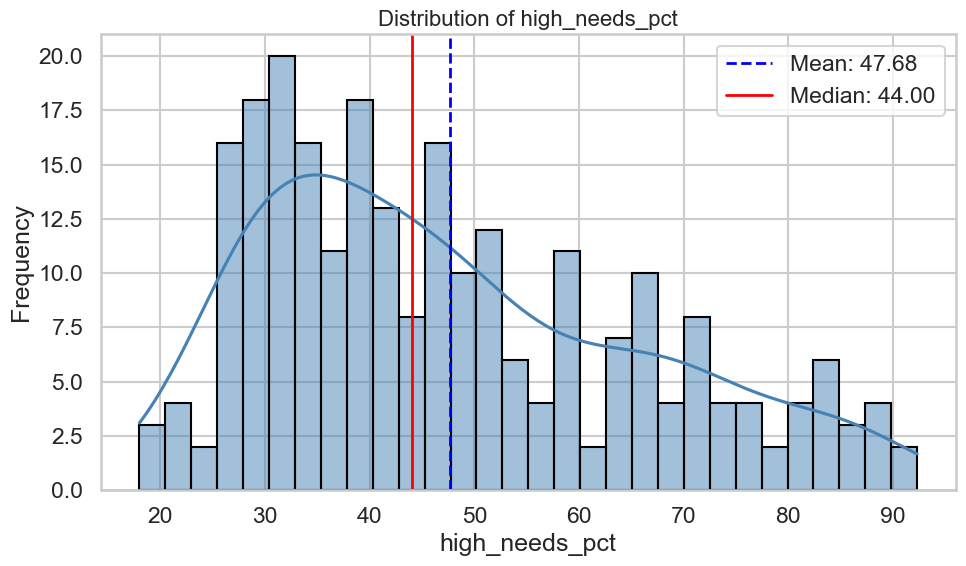

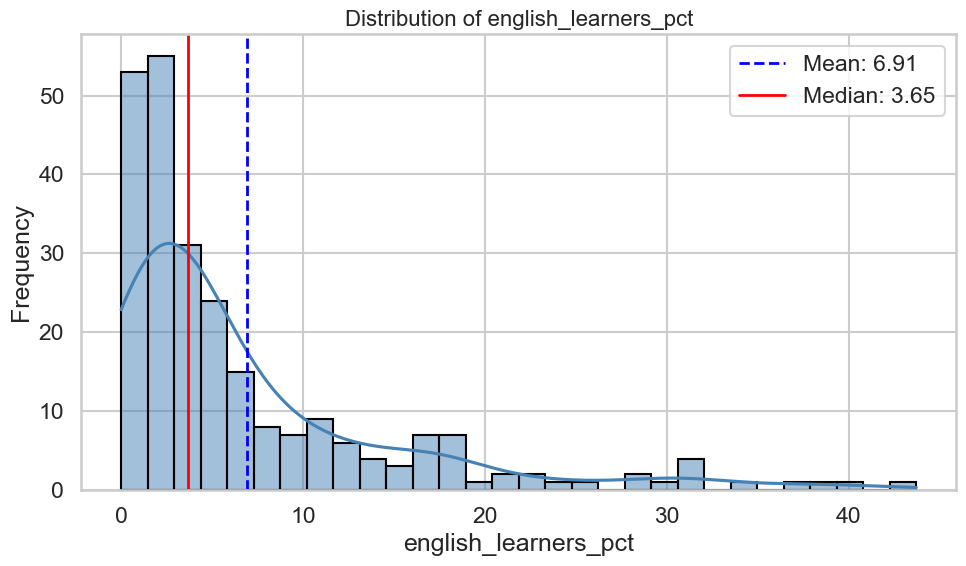

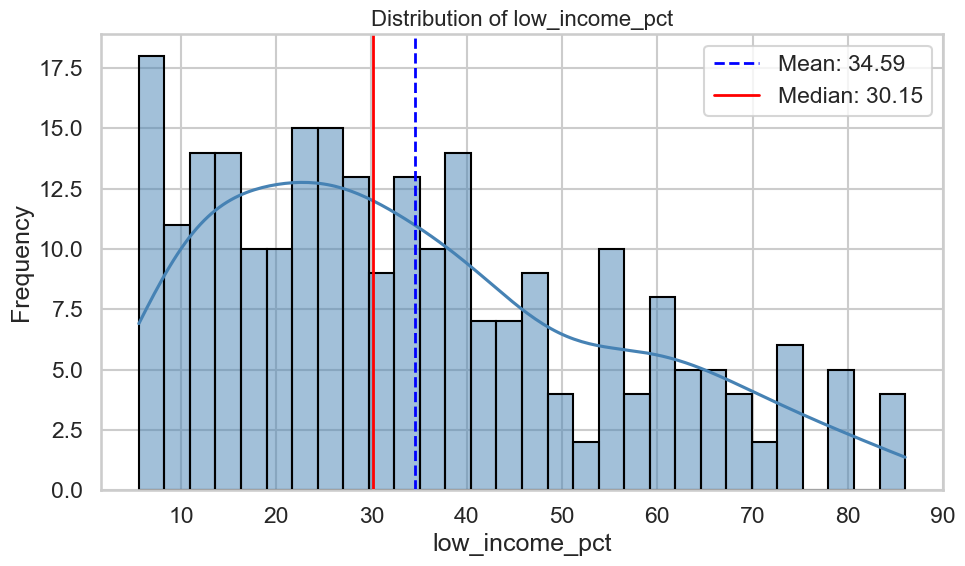

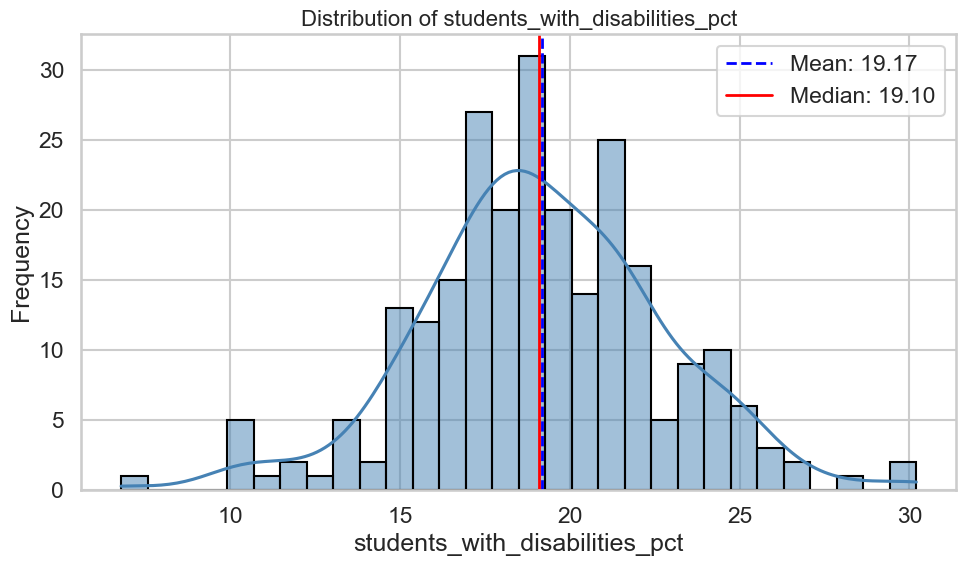

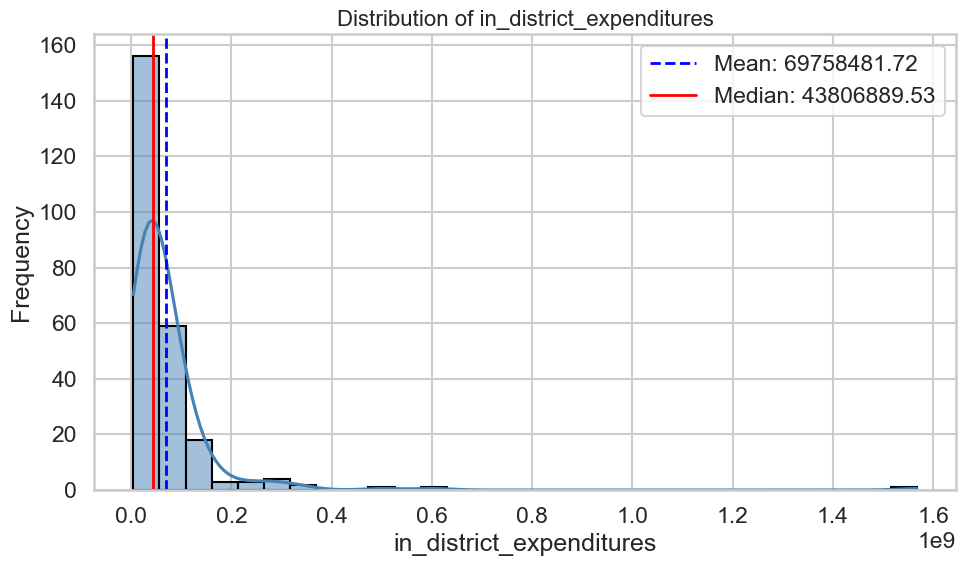

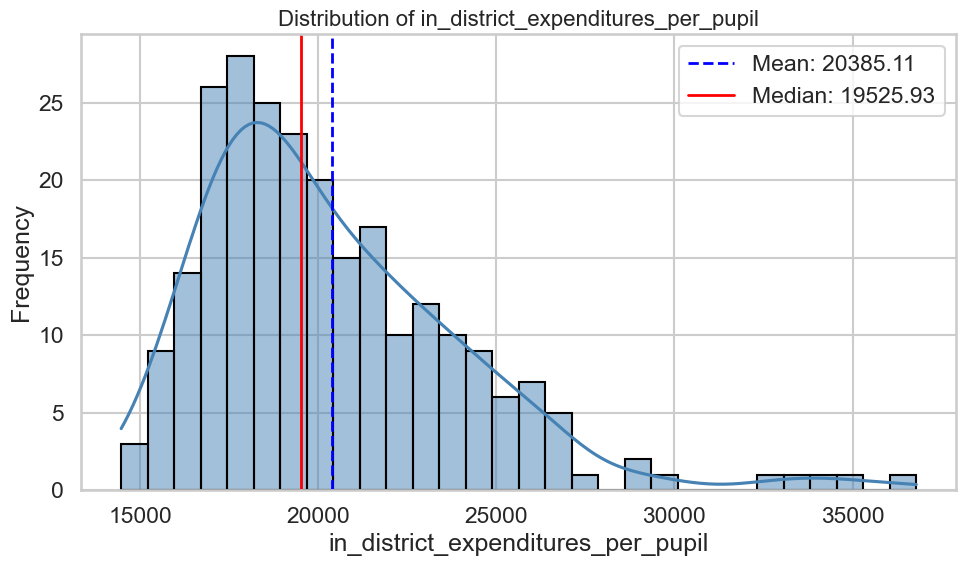

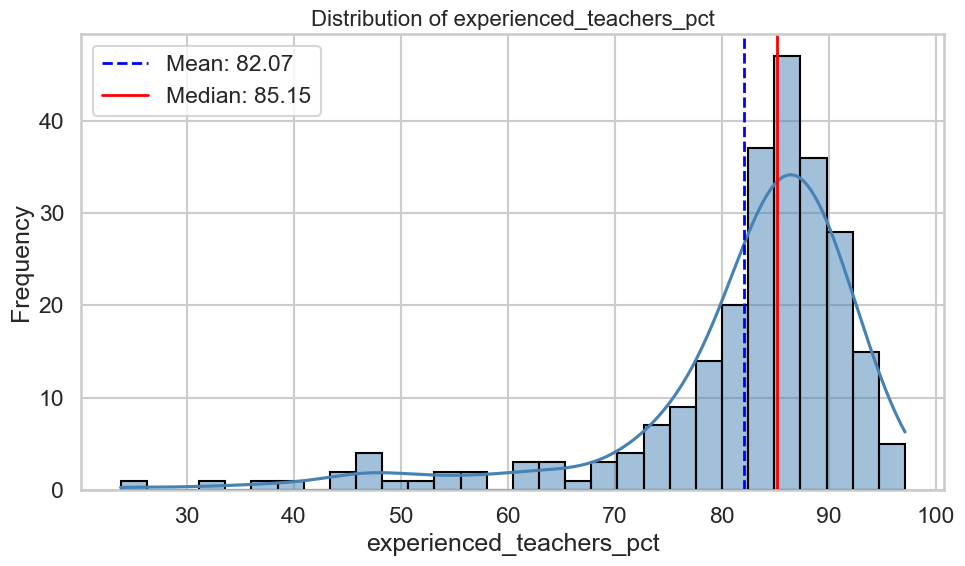

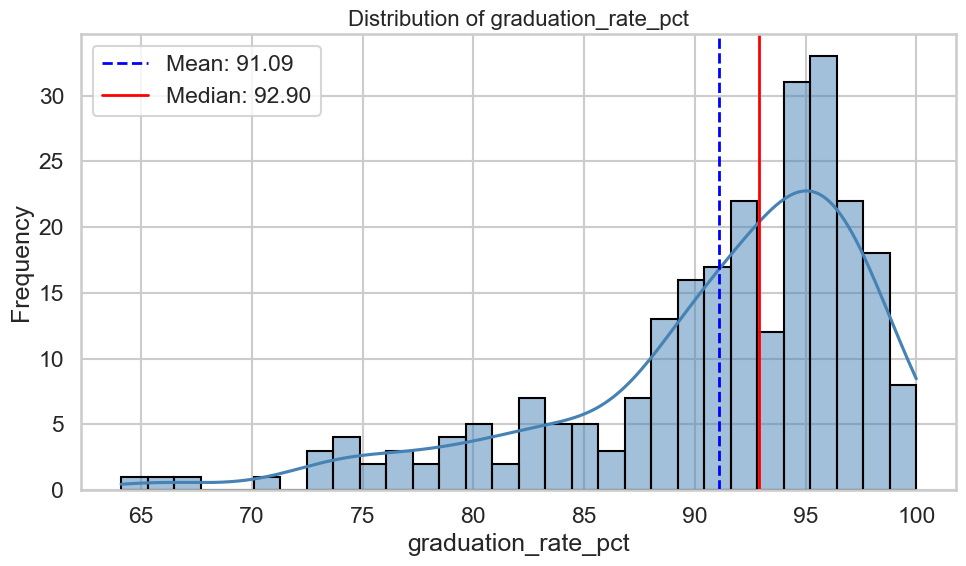

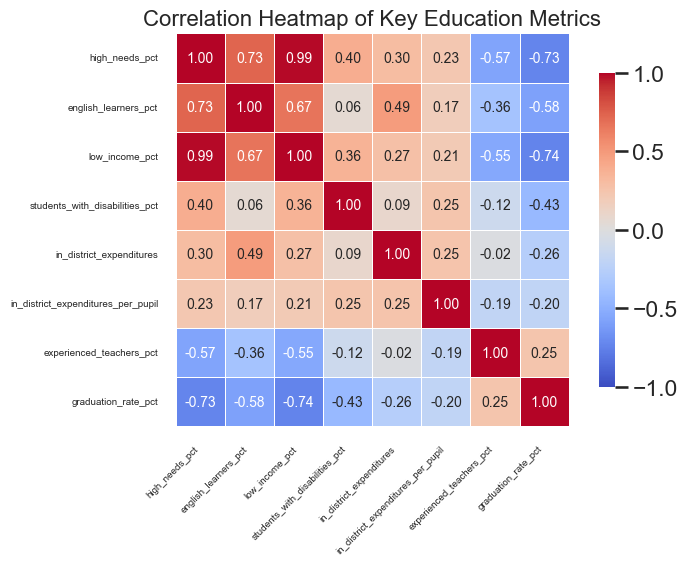

low_income_pct                       -0.741776
high_needs_pct                       -0.734205
english_learners_pct                 -0.581518
students_with_disabilities_pct       -0.434210
in_district_expenditures             -0.262960
in_district_expenditures_per_pupil   -0.201466
experienced_teachers_pct              0.248711
graduation_rate_pct                   1.000000
Name: graduation_rate_pct, dtype: float64


In [22]:
# Set a consistent visual style
sns.set(style='whitegrid', palette='viridis', context='talk')

hist_cols = [
    'high_needs_pct', 'english_learners_pct', 'low_income_pct',
    'students_with_disabilities_pct', 'in_district_expenditures',
    'in_district_expenditures_per_pupil', 'experienced_teachers_pct', 'graduation_rate_pct'
]
for col in hist_cols:
    col_dtype = df[col].dtype
    is_integer = np.issubdtype(col_dtype, np.integer)
    print(f"{col}: dtype = {col_dtype}, Is Integer? -> {is_integer}")
for col in hist_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='steelblue', edgecolor='black', bins=30)

    # Calculate mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Add mean and median lines
    plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='red', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Titles and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

numeric_cols = df[hist_cols].select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",          
    cmap='coolwarm',    
    vmin=-1, vmax=1,    
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10}, 
    cbar_kws={'shrink': 0.8}
)
plt.xticks(fontsize=7, fontname='Arial', rotation=45, ha='right')
plt.yticks(fontsize=7, fontname='Arial')
plt.title('Correlation Heatmap of Key Education Metrics', fontsize=16)
plt.tight_layout()
plt.show()
correlations = df[hist_cols].corr()['graduation_rate_pct'].sort_values()
print(correlations)

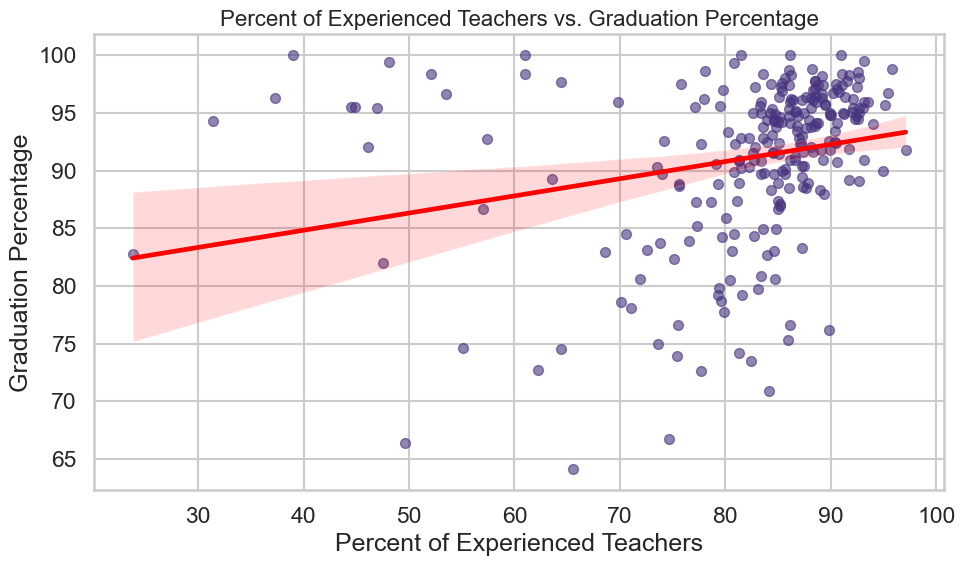

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='experienced_teachers_pct',
    y='graduation_rate_pct',
    data=df,
    scatter_kws={'alpha':0.6, 's':50},
    line_kws={'color':'red'}
)
plt.title('Percent of Experienced Teachers vs. Graduation Percentage', fontsize=16)
plt.xlabel('Percent of Experienced Teachers')
plt.ylabel('Graduation Percentage')
plt.tight_layout()
plt.show()

## E.D.A. - E.T.

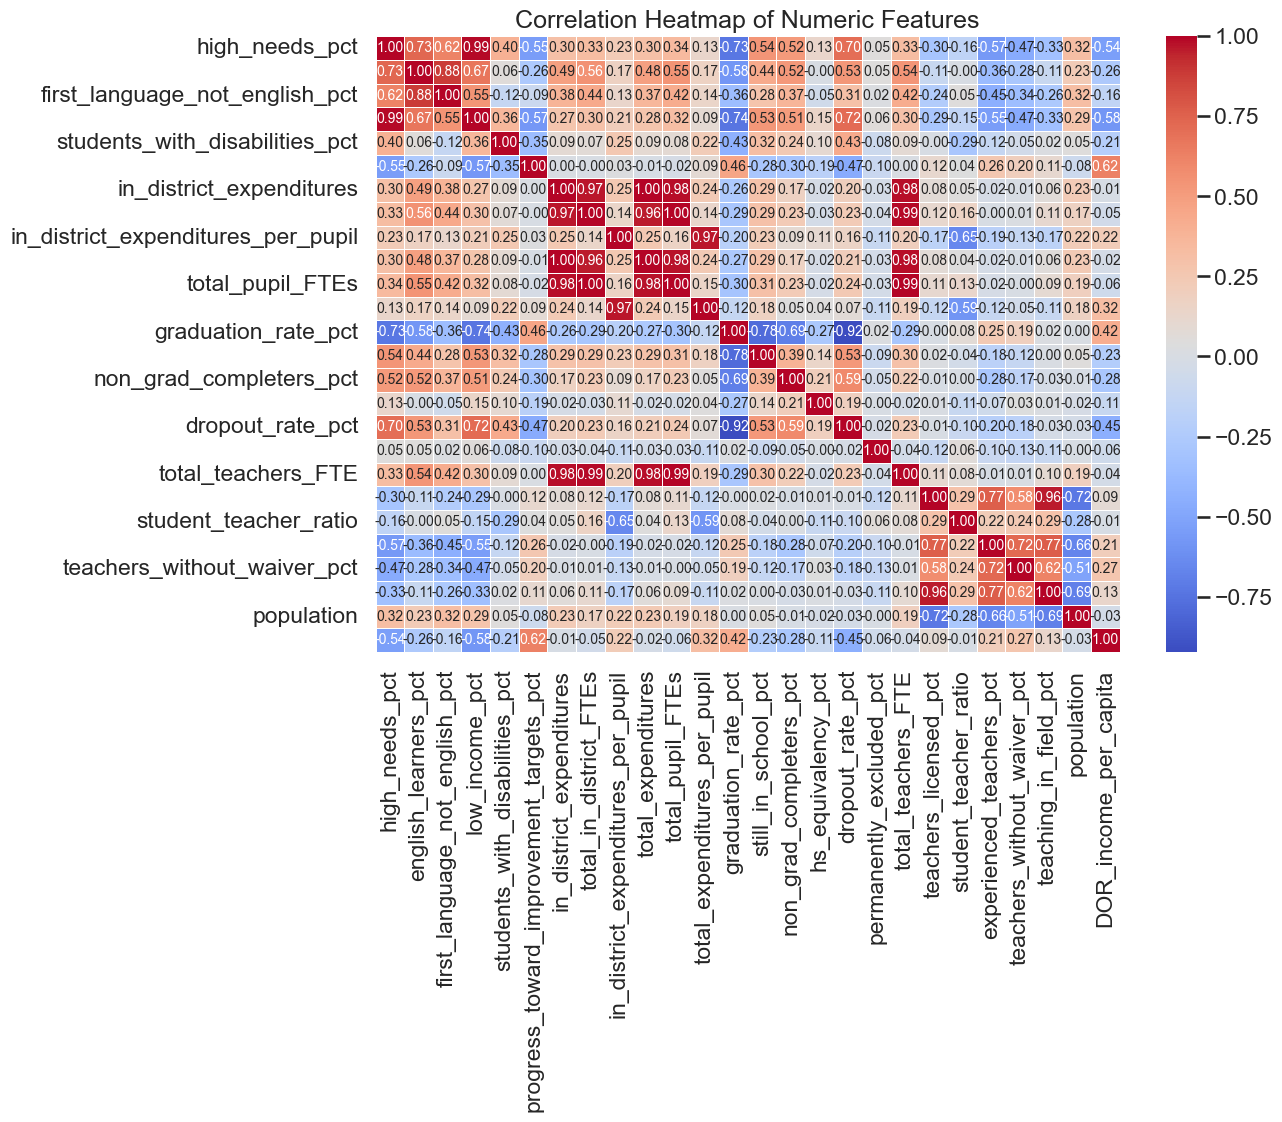

In [24]:

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Highly Positively Correlated (>= 0.7)**
| Feature 1                     | Feature 2                        | Corr ≈    |
| ----------------------------- | -------------------------------- | --------- |
| `high_needs_pct`              | `low_income_pct`                 | **0.90**  |
| `english_learners_pct`        | `first_language_not_english_pct` | **0.93**  |
| `in_district_expenditures`    | `total_expenditures`             | **≈1.00** |
| `total_in_district_FTEs`      | `total_teachers_FTE`             | **≈1.00** |
| `experienced_teachers_pct`    | `teaching_in_field_pct`          | **≈0.90** |
| `teachers_without_waiver_pct` | `teachers_licensed_pct`          | **≈0.90** |
| `in_district_expenditures`    | `total_in_district_FTEs`         | **≈0.90** |
| `total_pupil_FTEs`            | `total_expenditures`             | **≈0.90** |


**Highly Negatively Correlated (<= -0.7)**

| Feature 1             | Feature 2              | Corr ≈     |
| --------------------- | ---------------------- | ---------- |
| `graduation_rate_pct` | `dropout_rate_pct`     | **-0.90**  |
| `graduation_rate_pct` | `still_in_school_pct`  | **-0.87**  |
| `graduation_rate_pct` | `high_needs_pct`       | **-0.70+** |
| `graduation_rate_pct` | `low_income_pct`       | **-0.70+** |
| `graduation_rate_pct` | `english_learners_pct` | **-0.70+** |

Feature 2 has high correlation with graduation rate ( which is our target value)


#### Drop these columns, 

* first_language_not_english_pct
* total_expenditures
* total_teachers_FTE
* teaching_in_field_pct
* teachers_without_waiver_pct
* total_in_district_FTEs

-E.T.

In [25]:
columns_to_drop = [
    'first_language_not_english_pct',
    'total_expenditures',
    'total_teachers_FTE',
    'teaching_in_field_pct',
    'teachers_without_waiver_pct',
    'total_in_district_FTEs',
    'total_expenditures_per_pupil',
    'teachers_licensed_pct', 
    'total_pupil_FTEs'
]

df_clean = df.drop(columns=columns_to_drop)


In [26]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,...,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,permanently_excluded_pct,student_teacher_ratio,experienced_teachers_pct,members,population,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,,,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,2.423144e+07,...,0.0,0.0,0.0,0.0,0.0,11.9,81.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",317231.0,40029.375
Abington,47.3,11.0,34.4,,,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,3.560342e+07,...,1.3,0.7,0.0,9.2,0.0,13.9,81.3,Abington,17062.0,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,,,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,1.280195e+07,...,1.9,0.0,0.0,1.9,0.0,9.4,37.3,Boston,675647.0,55038.000
Acton-Boxborough,29.6,6.2,10.6,,,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,1.005648e+08,...,3.2,0.2,0.0,0.4,0.0,13.0,88.3,"Acton, Boxborough",29527.0,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,,,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,1.506501e+07,...,0.7,0.0,0.0,0.0,0.0,12.0,80.8,"Clinton, Hudson, Marlborough, Maynard",88059.0,37880.000


In [27]:
df_clean.shape

(248, 22)

In [28]:
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
Students with Disabilities#                 object
Students with Disabilities%                 object
students_with_disabilities_pct             float64
overall_classification                      object
reason_for_classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures                   float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
permanently_excluded_pct                   float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                        

### After dropping columns, we will check the correlation matrix again - E.T.

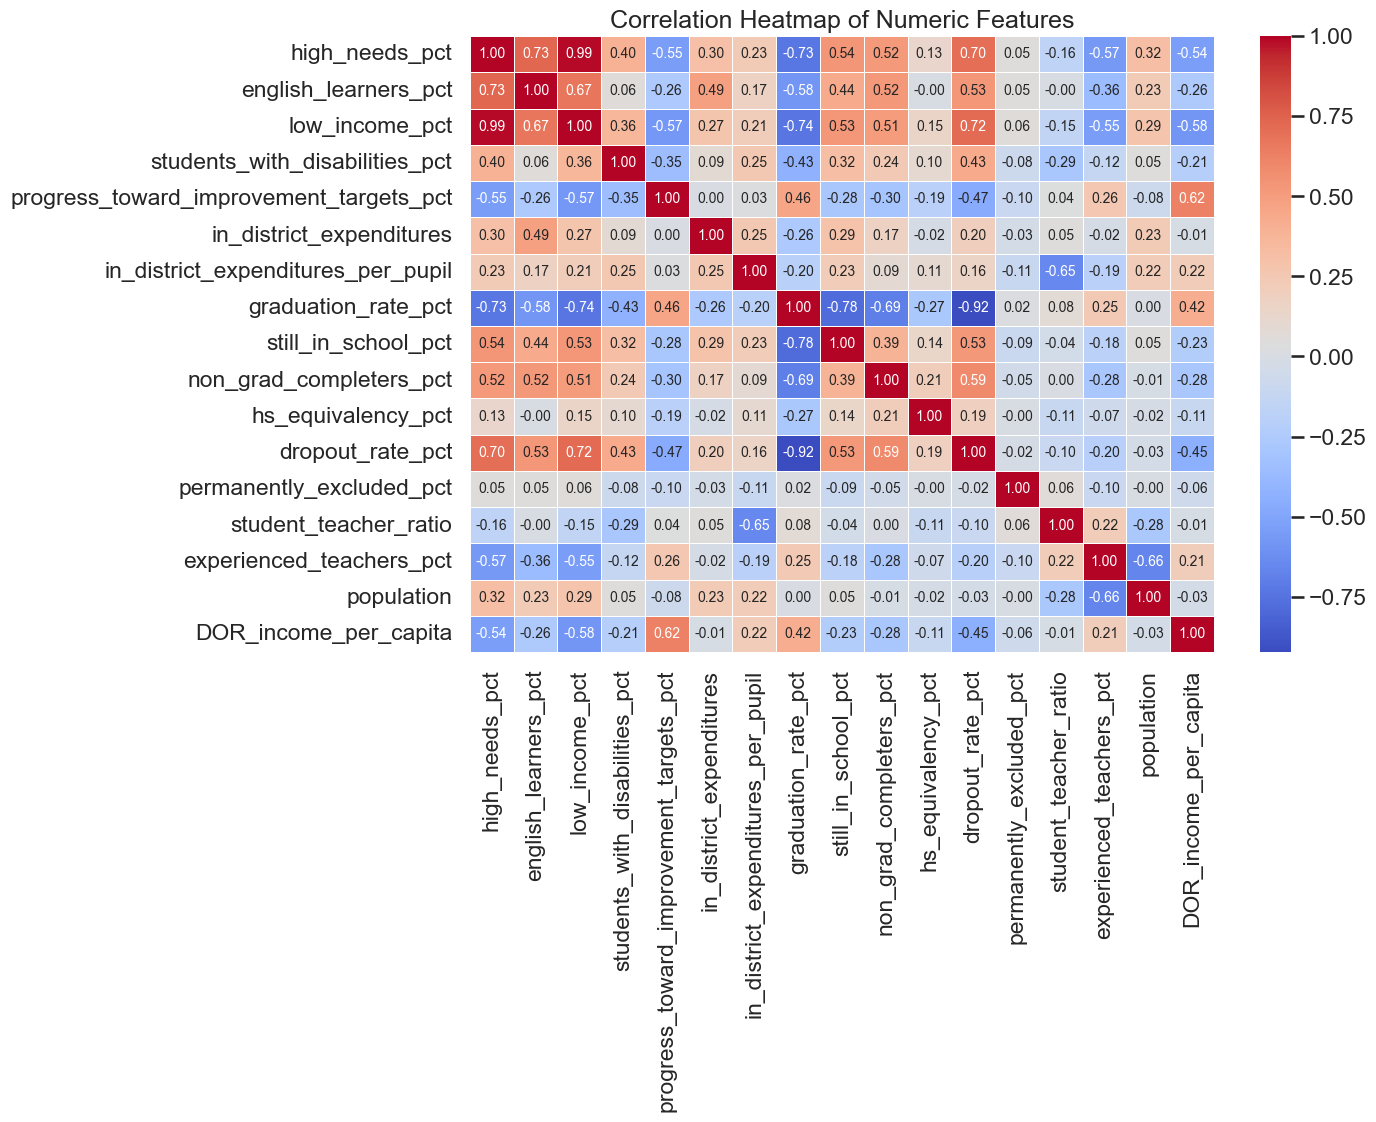

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)  # Ensures only numeric columns are included

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Step 4: Add title and show plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Compute and sort correlations with Target value. - E.T.

In [30]:

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Calculate correlations with the target
target_corr = numeric_df.corr()['graduation_rate_pct'].sort_values(ascending=False)

# Drop the self-correlation (1.0)
target_corr = target_corr[target_corr.index != 'graduation_rate_pct']

# Display the correlation report
print("Correlation with graduation_rate_pct:")
print(target_corr)


Correlation with graduation_rate_pct:
progress_toward_improvement_targets_pct    0.460202
DOR_income_per_capita                      0.416730
experienced_teachers_pct                   0.248711
student_teacher_ratio                      0.080658
permanently_excluded_pct                   0.021128
population                                 0.002587
in_district_expenditures_per_pupil        -0.201466
in_district_expenditures                  -0.262960
hs_equivalency_pct                        -0.269725
students_with_disabilities_pct            -0.434210
english_learners_pct                      -0.581518
non_grad_completers_pct                   -0.692457
high_needs_pct                            -0.734205
low_income_pct                            -0.741776
still_in_school_pct                       -0.783853
dropout_rate_pct                          -0.922975
Name: graduation_rate_pct, dtype: float64


The column **"*permanently_excluded_pct, in_district_expenditures, population*"** has very weak correlation with target value. We can drop it. - E.T.

In [31]:
columns_to_drop2 = [
    'permanently_excluded_pct',
    'in_district_expenditures', 
    'population'
]

df_clean = df_clean.drop(columns=columns_to_drop2)


In [32]:
df_clean.shape

(248, 19)

### Checking the OUTLIERS in a relationship with Target Value - graduation_rate_pct - E.T.


### Talk about these findings with team

These findings may appear to be outliers, but they might not actually be outliers. For instance, High percentages of English learners coupled with low graduation rates may seem unusual; however, this could represent a genuine situation. Instead of removing these cases, we should flag them. We can run our regression analysis both including and excluding these potential outliers. Afterwards, we can compare the results, including coefficients, R² values, and RMSE.

In [33]:
df_clean.dtypes

high_needs_pct                             float64
english_learners_pct                       float64
low_income_pct                             float64
Students with Disabilities#                 object
Students with Disabilities%                 object
students_with_disabilities_pct             float64
overall_classification                      object
reason_for_classification                   object
progress_toward_improvement_targets_pct    float64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
still_in_school_pct                        float64
non_grad_completers_pct                    float64
hs_equivalency_pct                         float64
dropout_rate_pct                           float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
members                                     object
DOR_income_per_capita                      float64
dtype: object

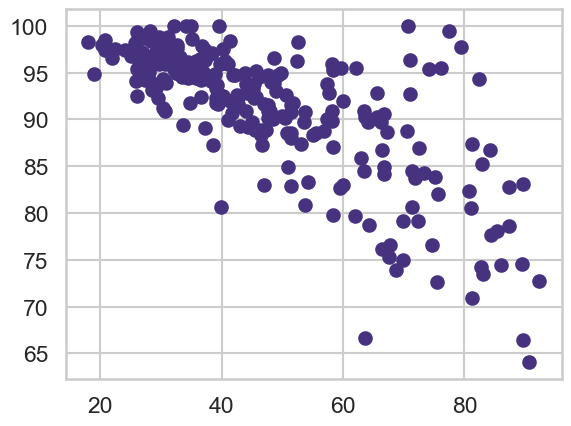

In [34]:
plt.scatter(x = 'high_needs_pct', y = 'graduation_rate_pct', data = df_clean)

In [35]:
df_clean.query('graduation_rate_pct < 60 and high_needs_pct > 80') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


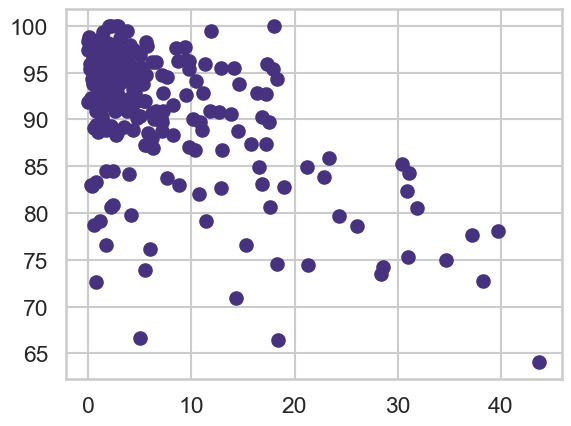

In [36]:
plt.scatter(x = 'english_learners_pct', y = 'graduation_rate_pct', data = df_clean)

In [37]:
df_clean.query('graduation_rate_pct < 40 and english_learners_pct > 50') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


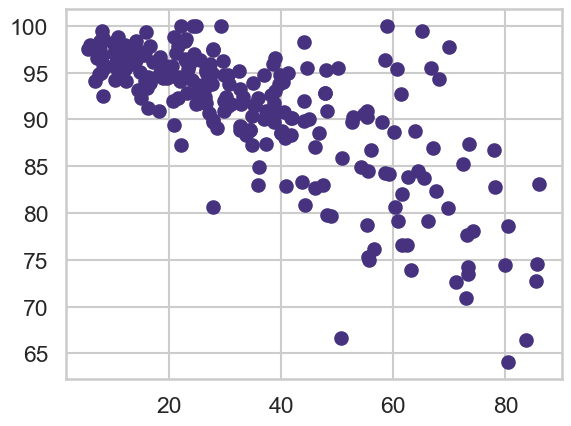

In [38]:
plt.scatter(x = 'low_income_pct', y = 'graduation_rate_pct', data = df_clean)

In [39]:
df_clean.query('graduation_rate_pct < 40 and low_income_pct > 60') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


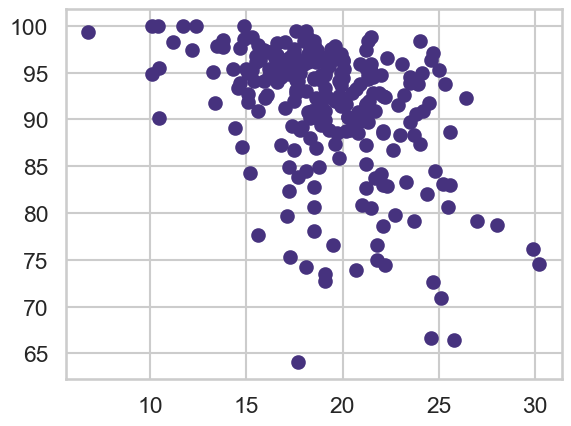

In [40]:
plt.scatter(x = 'students_with_disabilities_pct', y = 'graduation_rate_pct', data = df_clean)

In [41]:
df_clean.query('graduation_rate_pct < 40 and students_with_disabilities_pct >40') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


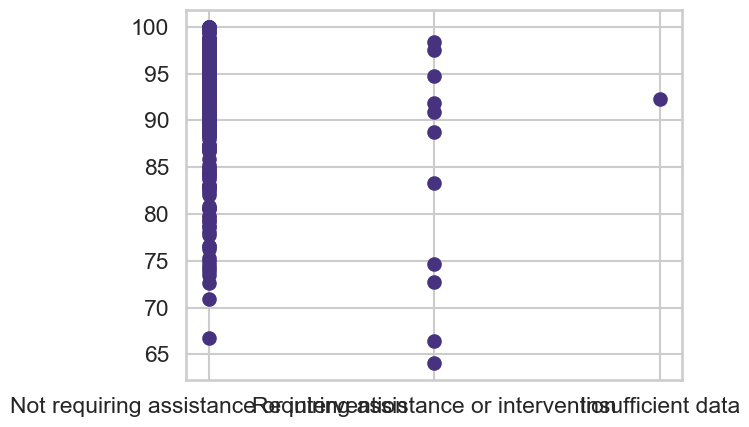

In [42]:
plt.scatter(x = 'overall_classification', y = 'graduation_rate_pct', data = df_clean)

In [43]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


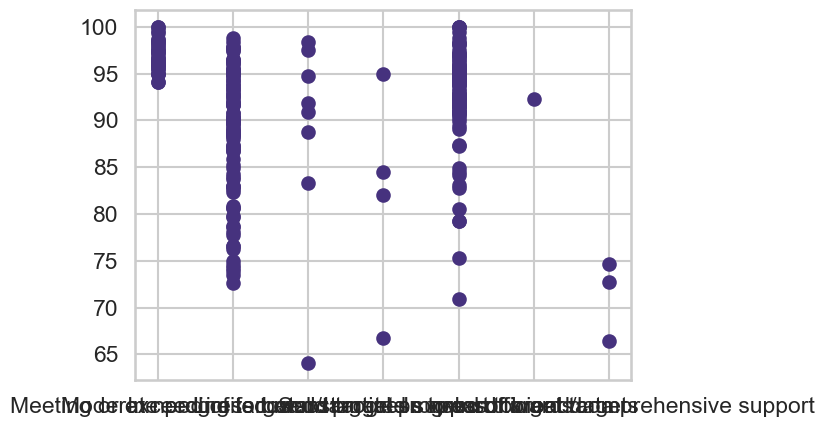

In [44]:
plt.scatter(x = 'reason_for_classification', y = 'graduation_rate_pct', data = df_clean)

In [45]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


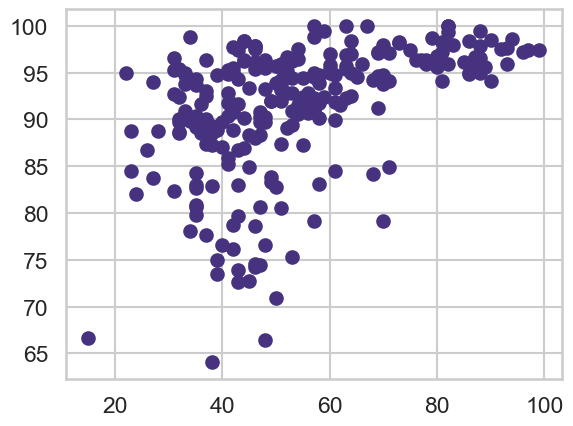

In [46]:
plt.scatter(x = 'progress_toward_improvement_targets_pct', y = 'graduation_rate_pct', data = df_clean)

In [47]:
df_clean.query('graduation_rate_pct < 40 and progress_toward_improvement_targets_pct< 20') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


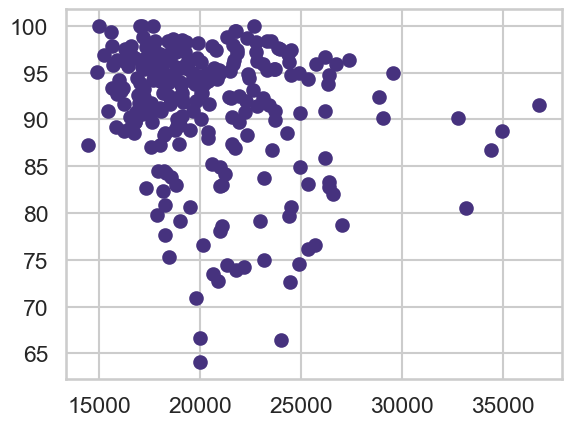

In [48]:
plt.scatter(x = 'in_district_expenditures_per_pupil', y = 'graduation_rate_pct', data = df_clean)

In [49]:
df_clean.query('graduation_rate_pct < 40') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


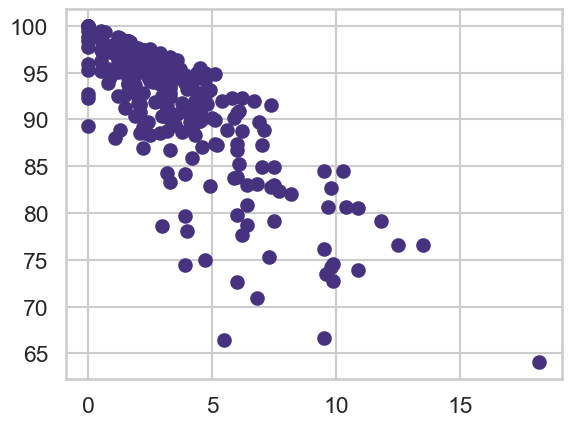

In [50]:
plt.scatter(x = 'still_in_school_pct', y = 'graduation_rate_pct', data = df_clean)

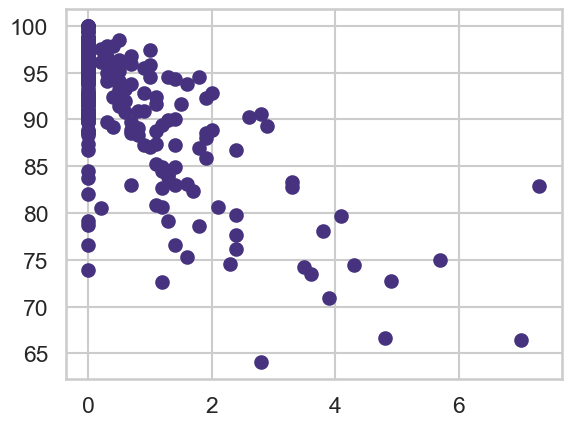

In [51]:
plt.scatter(x = 'non_grad_completers_pct', y = 'graduation_rate_pct', data = df_clean)

In [52]:
df_clean.query('graduation_rate_pct < 25 and non_grad_completers_pct<2') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


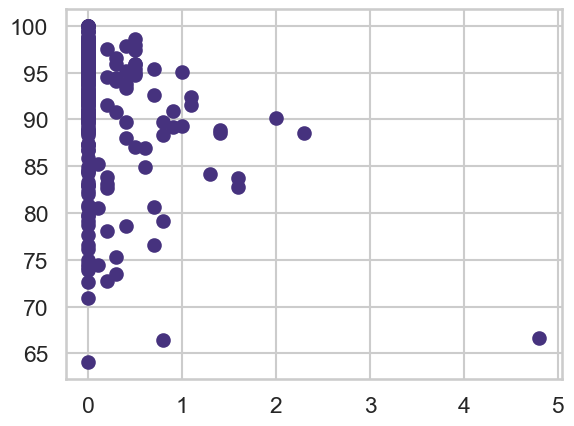

In [53]:
plt.scatter(x = 'hs_equivalency_pct', y = 'graduation_rate_pct', data = df_clean)

In [54]:
df_clean.query('graduation_rate_pct < 25 and hs_equivalency_pct==0') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


In [55]:
df_clean.query('hs_equivalency_pct>4') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,
North Brookfield,63.7,5.0,50.7,,,24.6,Not requiring assistance or intervention,Limited or no progress toward targets,15.0,20008.84,66.7,9.5,4.8,4.8,14.3,10.8,74.7,North Brookfield,30230.0


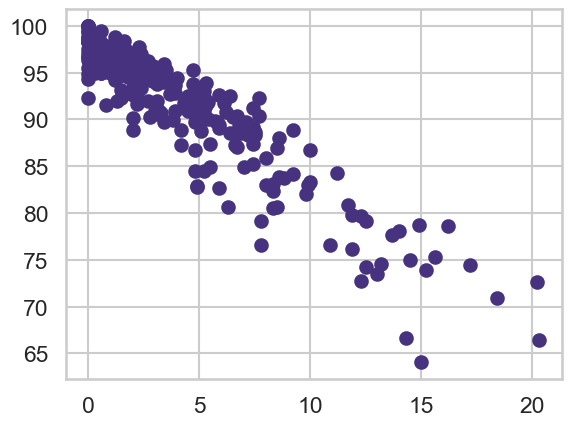

In [56]:
plt.scatter(x = 'dropout_rate_pct', y = 'graduation_rate_pct', data = df_clean)

In [57]:
df_clean.query('graduation_rate_pct < 20 and dropout_rate_pct<10') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


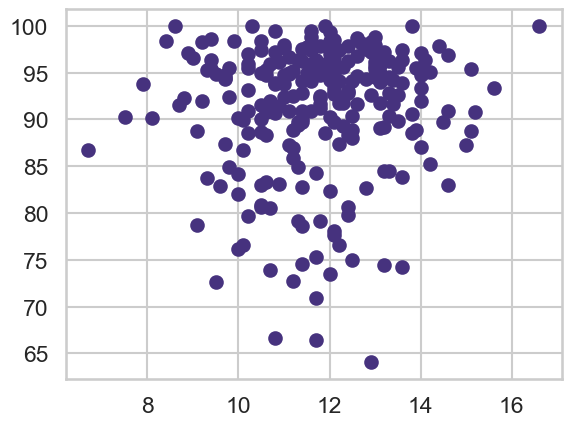

In [58]:
plt.scatter(x = 'student_teacher_ratio', y = 'graduation_rate_pct', data = df_clean)

In [59]:
df_clean.query('graduation_rate_pct < 25 and student_teacher_ratio<18') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


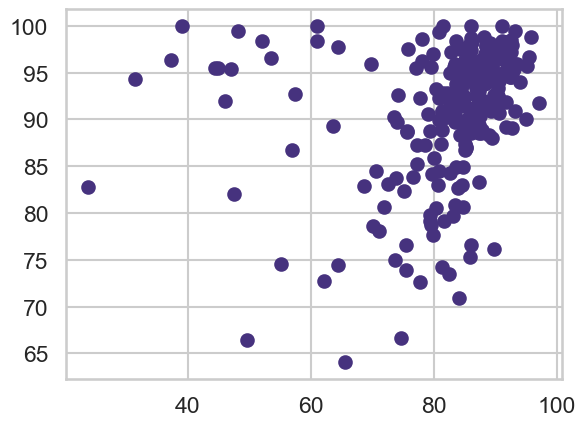

In [60]:
plt.scatter(x = 'experienced_teachers_pct', y = 'graduation_rate_pct', data = df_clean)

In [61]:
df_clean.query('graduation_rate_pct < 25 and experienced_teachers_pct>80') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


In [62]:
df_clean.query('graduation_rate_pct > 60 and experienced_teachers_pct<28') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,
Roxbury Preparatory Charter (District),87.3,19.0,78.2,,,18.5,Not requiring assistance or intervention,Substantial progress toward targets,50.0,26399.94,82.8,7.4,3.3,1.6,4.9,11.4,23.8,Boston,55038.0


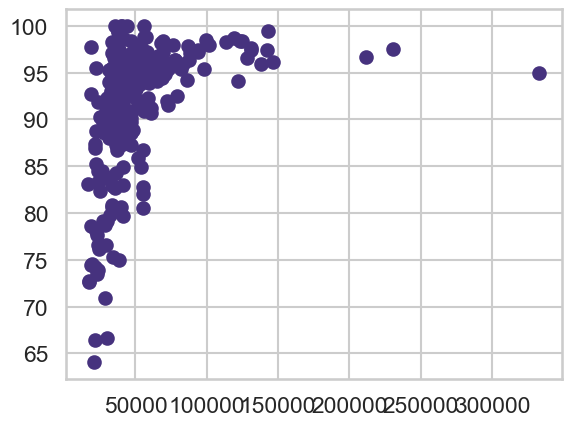

In [63]:
plt.scatter(x = 'DOR_income_per_capita', y = 'graduation_rate_pct', data = df_clean)

In [64]:
df_clean.query('graduation_rate_pct <20 and DOR_income_per_capita <60000') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,


In [65]:
df_clean.query('graduation_rate_pct >80 and DOR_income_per_capita > 300000') 


,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,
Weston,27.6,3.3,7.9,,,17.2,Not requiring assistance or intervention,Meeting or exceeding targets,86.0,29581.26,95.0,4.4,0.0,0.0,0.6,11.9,82.6,Weston,333105.0


### E.D.A. - A.F.
Create box plots of target variable ('graduation_rate_pct') across categories for the two categorical variables ('overall_classification' and 'reason_for_classification').

C:\Users\felix\AppData\Local\Temp\ipykernel_61724\2484169903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felix\AppData\Local\Temp\ipykernel_61724\2484169903.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


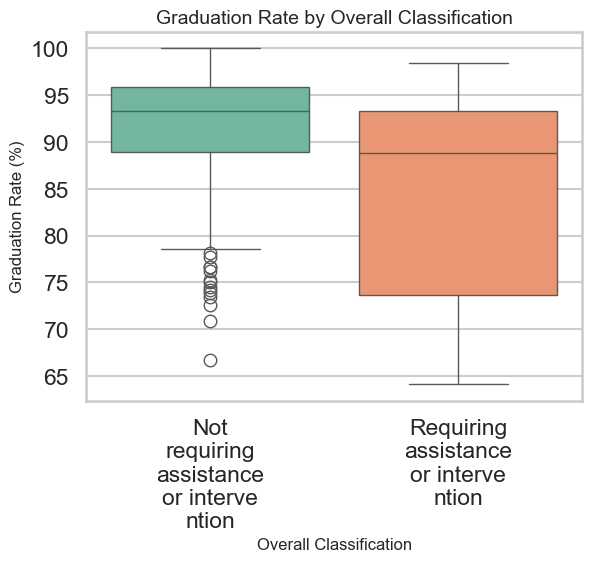

In [66]:
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='overall_classification', 
    y='graduation_rate_pct', 
    data=df[df['overall_classification'] != 'Insufficient data'],
    palette='Set2'
)

# Wrap x-axis labels properly
labels = [textwrap.fill(label.get_text(), 10) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.xlabel("Overall Classification", fontsize=12)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.title("Graduation Rate by Overall Classification", fontsize=14)

plt.show()

C:\Users\felix\AppData\Local\Temp\ipykernel_61724\499320245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felix\AppData\Local\Temp\ipykernel_61724\499320245.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


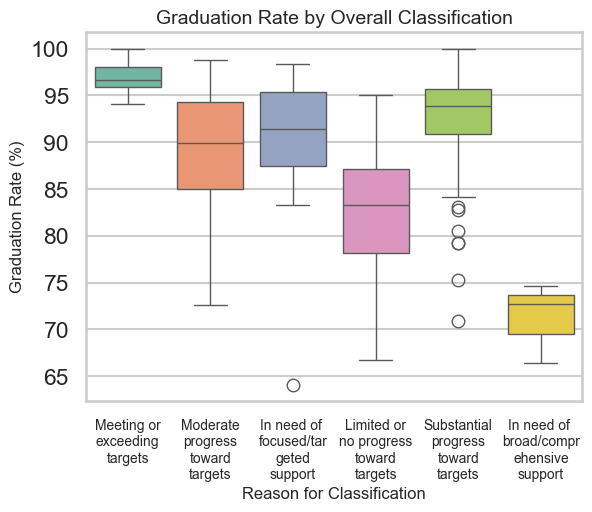

In [67]:
sns.boxplot(
    x='reason_for_classification', 
    y='graduation_rate_pct', 
    data=df[df['reason_for_classification'] != 'Insufficient data'],
    palette='Set2'
)

# Wrap x-axis labels properly
labels = [textwrap.fill(label.get_text(), 11) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.xticks(fontsize=10)
plt.xlabel("Reason for Classification", fontsize=12)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.title("Graduation Rate by Overall Classification", fontsize=14)

plt.show()

In [68]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,Students with Disabilities#,Students with Disabilities%,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,members,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,,,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,"Auburn, Leicester, Millbury, Oxford, Shrewsbur...",40029.375
Abington,47.3,11.0,34.4,,,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,Abington,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,,,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,Boston,55038.000
Acton-Boxborough,29.6,6.2,10.6,,,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,"Acton, Boxborough",69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,,,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,"Clinton, Hudson, Marlborough, Maynard",37880.000


In [69]:
# drop the unnecessary 'members' and "Students with Disabilities" columns

df_clean.drop(columns=['members', 'Students with Disabilities#', 'Students with Disabilities%'],inplace= True)

In [70]:
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,37880.000


In [71]:
df_clean.shape

(248, 16)

In [72]:
# save the final dataframe to a new Excel file
output_file = "clean_data.xlsx"
df_clean.to_excel(output_file, index= True)

In [73]:
# print the first few rows of the final dataframe
pd.set_option('display.max_columns', None)
df_clean.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,37880.000
